In [1]:
import sys
import os
import matplotlib.pyplot as plt
import cv2

import numpy as np

# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from src.data_processing.dataset_loader import CoastData
from src.data_processing.dataset_preprocessor_bilstm import DatasetPreprocessorBiLSTM

In [2]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/raw/SCLabels_v1.0.0/"))

# Load the data, all the different stations
data = CoastData(data_path, name="global")

filtered_data = data.get_images_and_masks() 

filtered_data = data.split_data()


# Get the first image and mask
index = 2
image_path = filtered_data['train']['images'][index]
mask_path = filtered_data['train']['masks'][index]

print("Image:", image_path)
print("Mask:", mask_path)

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57
Image: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/images/1549465320.Wed.Feb.06_16_02_00.CET.2019.agrelo.image.jpg
Mask: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/masks/1549465320.Wed.Feb.06_16_02_00.CET.2019.agrelo.mask.png


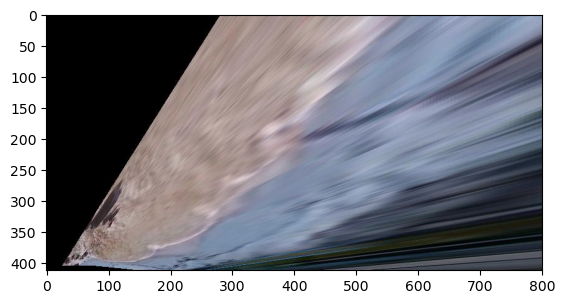

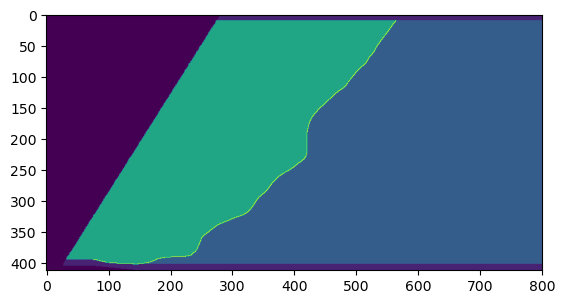

In [3]:
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(mask)

Image shape: (412, 801, 3)
Mask shape: (412, 801)


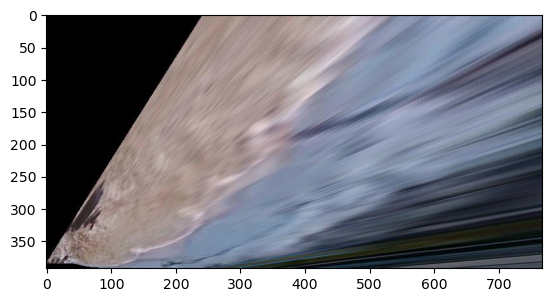

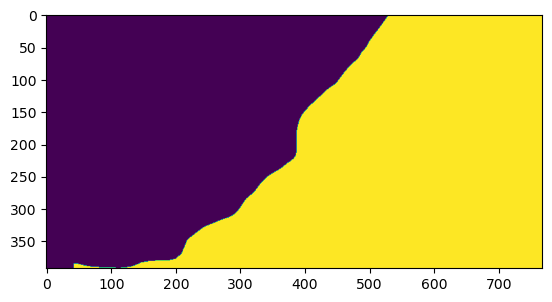

In [4]:
dataset_preprocessor_bilstm = DatasetPreprocessorBiLSTM()

image = dataset_preprocessor_bilstm.load_image(image_path)
mask = dataset_preprocessor_bilstm.load_mask(mask_path)

print("Image shape:", image.shape)
print("Mask shape:", mask.shape)

mapping = {
    0: 2,    # Background → Class 2 (after the mapping, we will transform it to binary)
    25: 2,   # Not classified → Class 2 (after the mapping, we will transform it to binary)
    75: 1,   # Land → Class 2
    150: 0,  # Sea → Class 3
    255: 1   # Shoreline → Class 4
}

new_image, new_mask = dataset_preprocessor_bilstm.process_image(image, mask, mask_mapping=mapping)

plt.imshow(new_image)
plt.show()  

plt.imshow(new_mask)
plt.show()

In [5]:
new_data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_bilstm/"))
dataset_preprocessor_bilstm.preprocess(dataset_path=data_path, dataset_output_path=new_data_path, mask_mapping=mapping)

IndexError: index 205 is out of bounds for axis 0 with size 205